|| Pop 1: (999, 5) || 


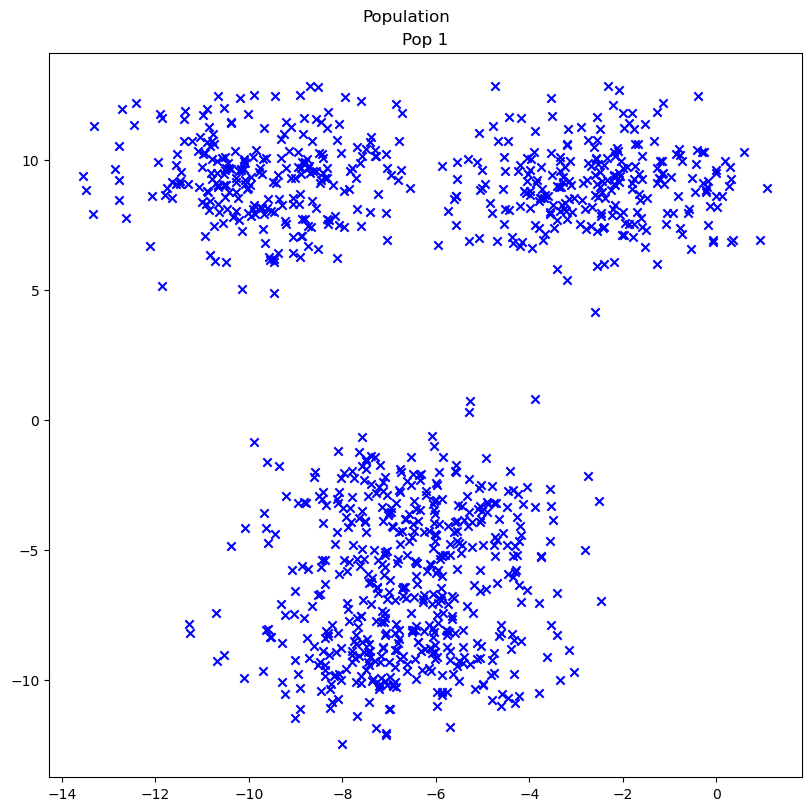

In [13]:
import pandas as pd   # We require pandas to import the data from the csv files.
import numpy as np    # We require numpy for the implementation of k-means.
import matplotlib.pyplot as plt # We require pyplot to visualise the data.

# Import the data -> ecommerce.csv
pop1 = pd.read_csv("ecommerce.csv").values
print("|| Pop 1: " + str(pop1.shape) + " || ")
fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches(8,8)

# Give the whole figure a title
fig.suptitle("Population")

ax.scatter(pop1[:,0], pop1[:,1], color="blue", marker="x")
ax.set_title("Pop 1")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   -7.0237  999 non-null    float64
 1   -2.7803  999 non-null    float64
 2   -1.5966  999 non-null    float64
 3   0.2197   999 non-null    float64
 4   -5.9672  999 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB
None
         -7.0237     -2.7803     -1.5966      0.2197     -5.9672
count  999.00000  999.000000  999.000000  999.000000  999.000000
mean    -6.35199    1.421334    4.792369   -0.728264   -3.309442
std      2.95596    8.085229    3.069209    3.536782    4.741810
min    -13.54190  -12.474700   -4.016300  -10.147400  -10.628700
25%     -8.45040   -6.473650    2.524500   -3.365150   -6.734050
50%     -6.61540    4.152400    5.455300   -0.093300   -5.008000
75%     -4.25295    9.196000    7.108250    2.072950    0.190750
max      1.09590   12.860100   11.226000    7.752300    8.951100

C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

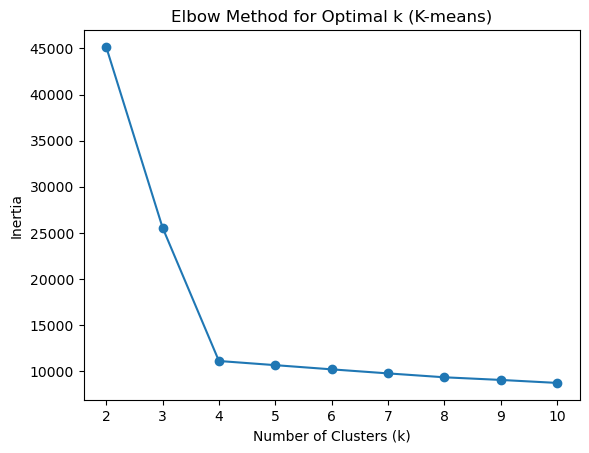

C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

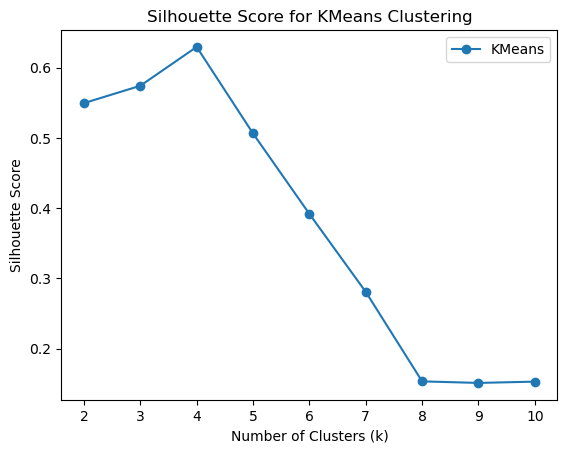

Optimal k for KMeans: 4


C:\Users\smk10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal number of clusters (K-means): 4
   -7.0237  -2.7803  -1.5966  0.2197  -5.9672  KMeans_Cluster
0  -9.4213   9.1296   7.2426 -4.7139  -5.2615               0
1  -9.3710   9.4341   6.1217 -3.4081  -7.5911               0
2  -2.5985   4.1524   3.1033  1.5943  -8.7513               3
3  -0.8058  10.4453   5.6170  1.5003  -5.7412               3
4  -8.0242  -9.9920   5.9137  3.2665   3.8707               2


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Step 1: Data Exploration
df = pd.read_csv('ecommerce.csv')
print(df.info())
print(df.describe())

# Step 3: Determine the Optimal Number of Clusters
# K-means Clustering - Elbow Method
k_values = range(2, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph for K-means
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (K-means)')
plt.show()

X=df.values
kmeans_silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    score = silhouette_score(X, labels)
    kmeans_silhouette_scores.append(score)

# Plot Silhouette Score graph for KMeans
plt.plot(k_values, kmeans_silhouette_scores, marker='o', label='KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.legend()
plt.show()

# Find optimal k for KMeans
optimal_k_kmeans = k_values[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
print(f'Optimal k for KMeans: {optimal_k_kmeans}')


kmeans_final = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
df['KMeans_Cluster'] = kmeans_final.fit_predict(df)



print(f"Optimal number of clusters (K-means): {optimal_k_kmeans}")

print(df.head())


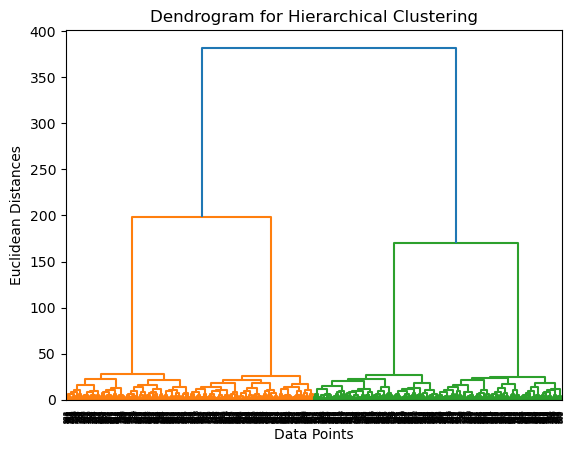

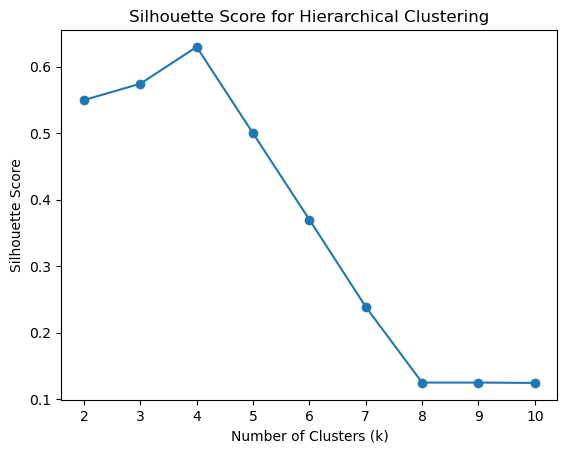

Optimal k for Hierarchical: 4
   -7.0237  -2.7803  -1.5966  0.2197  -5.9672  Hierarchical_Cluster
0  -9.4213   9.1296   7.2426 -4.7139  -5.2615                     0
1  -9.3710   9.4341   6.1217 -3.4081  -7.5911                     0
2  -2.5985   4.1524   3.1033  1.5943  -8.7513                     0
3  -0.8058  10.4453   5.6170  1.5003  -5.7412                     0
4  -8.0242  -9.9920   5.9137  3.2665   3.8707                     2


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your dataset (replace 'your_data.csv' with the actual file name)
df = pd.read_csv('ecommerce.csv')

# Assume X is your feature matrix
X = df.values

# Determine the range of k values to try
k_values = range(2, 11)

# Plot silhouette scores for hierarchical clustering
silhouette_scores = []

for k in k_values:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X)
    
    # Calculate silhouette score
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Plot Silhouette Score graph
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

# Perform hierarchical clustering with the optimal k (you can choose based on the graph)
optimal_k = 3  # Adjust based on the analysis
hierarchical_final = AgglomerativeClustering(n_clusters=optimal_k)
labels_final = hierarchical_final.fit_predict(X)
optimal_k_hierarchical = k_values[silhouette_scores.index(max(silhouette_scores))]
df['Hierarchical_Cluster'] = hierarchical_final.fit_predict(X)
print(f'Optimal k for Hierarchical: {optimal_k_hierarchical}')
print(df.head())
plt.show()




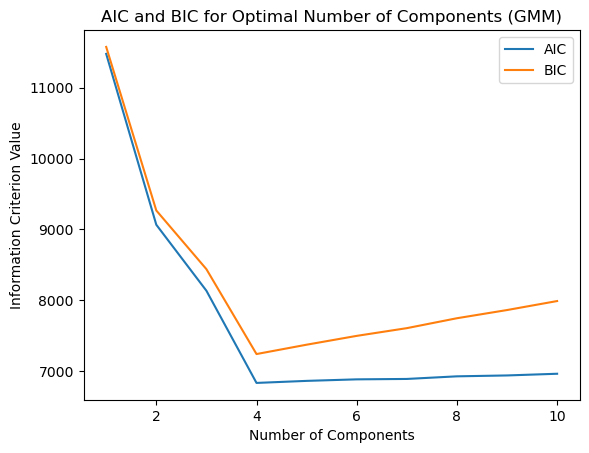

Optimal number of components (GMM): 4
   -7.0237  -2.7803  -1.5966  0.2197  -5.9672  GMM_Cluster
0  -9.4213   9.1296   7.2426 -4.7139  -5.2615            0
1  -9.3710   9.4341   6.1217 -3.4081  -7.5911            0
2  -2.5985   4.1524   3.1033  1.5943  -8.7513            1
3  -0.8058  10.4453   5.6170  1.5003  -5.7412            1
4  -8.0242  -9.9920   5.9137  3.2665   3.8707            3


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Step 1: Data Exploration
df = pd.read_csv('ecommerce.csv')

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 3: Determine the Optimal Number of Clusters (GMM)
# Use the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC)
n_components = range(1, 11)
aic_values = []
bic_values = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_scaled)
    aic_values.append(gmm.aic(df_scaled))
    bic_values.append(gmm.bic(df_scaled))

# Plot AIC and BIC values to find the optimal number of components
plt.plot(n_components, aic_values, label='AIC')
plt.plot(n_components, bic_values, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Value')
plt.legend()
plt.title('AIC and BIC for Optimal Number of Components (GMM)')
plt.show()

# Choose the optimal number of components based on AIC or BIC
optimal_components = n_components[aic_values.index(min(aic_values))]  # You can use BIC as well

# Step 4: Final Clustering
gmm_final = GaussianMixture(n_components=optimal_components, random_state=42)
df['GMM_Cluster'] = gmm_final.fit_predict(df_scaled)

# Display the clustered data
print(f"Optimal number of components (GMM): {optimal_components}")
print(df.head())


After applying K-means, hierarchical clustering, and Bayesian Information Criterion (BIC) analysis to the ecommerce dataset with 1000 customers, it is evident that the optimal number of clusters is 4. K-means and hierarchical clustering consistently converged to this value, while BIC, a model selection criterion, indicated that a model with 4 clusters provides the best balance of fit and complexity. This conclusion is reinforced by graphical representations, such as silhouette plots and dendrograms, showcasing distinct clusters and their cohesion. The chosen number of clusters optimally captures the inherent structure within the data, setting the foundation for effective customer segmentation analysis in subsequent tasks.